## ----------------------------------------------------
# Estimación del número $\pi$                          
## ----------------------------------------------------


Queremos estimar el número pi en base planteamiento de cuantos dardos caen dentro de un circulo inscrito en un cuadrado.

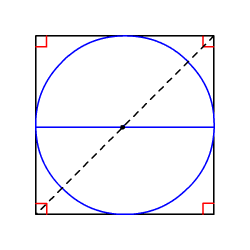

Definimos como:

$$\frac{Ao}{Ac}=\frac{n}{N} $$

donde:

* $n$: Número de éxitos
* $N$: Número total de intentos

Peron haremos el análisis en un cuarto de la figura anterior.





## Experimento

# Por simulación

In [2]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
def estimacion_pi(N):
  n=0
  K=0
  C=[]
  for i in range(N):
    x=rd.random()
    y=rd.random()
    if y <= np.sqrt(1-x**2):
      n+=1
      K=4*(n/(i+1))
      C.append(K)


    p=n/N
    estimate=4*p


  return C, estimate

3.1304615384615384


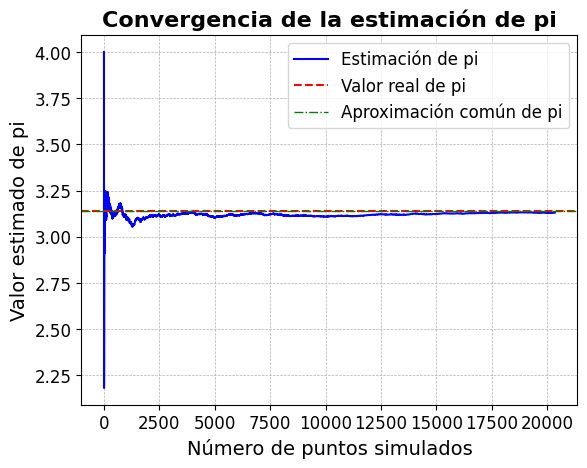

In [4]:
G, h=estimacion_pi(26000)
print(h)



# Estilo de la gráfica
plt.plot(G, color='blue', linestyle='-', linewidth=1.5, label='Estimación de pi')

# Líneas de referencia
plt.axhline(y=np.pi, color='red', linestyle='--', linewidth=1.5, label='Valor real de pi')
plt.axhline(y=3.14, color='green', linestyle='-.', linewidth=1, label='Aproximación común de pi')

# Configuración de etiquetas y título
plt.xlabel('Número de puntos simulados', fontsize=14)
plt.ylabel('Valor estimado de pi', fontsize=14)
plt.title('Convergencia de la estimación de pi', fontsize=16, fontweight='bold')

# Añadir una cuadrícula para mayor legibilidad
plt.grid(True, linestyle='--', linewidth=0.5)

# Añadir una leyenda
plt.legend(fontsize=12)

# Mejorar el aspecto de los ejes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Mostrar la gráfica
plt.show()


De la gráfica de convergencia podemos ver que logra una aproximación "aceptable" con un tamaño aproximado de 26,000 dardos lo cual es mucho y no computacionalmente correcto.

Si bien ya generamos el experimento es momento de hacer la simulación, lo que implica realizar el experimeto varias veces. Por lo que reescribimos el código ya que nos interesa ahora la gráfica de convergencia si no solo el último dato.



In [4]:
def est_pi(N):
  n=0
  for i in range(N):
    x=rd.random()
    y=rd.random()
    if y <= np.sqrt(1-x**2):
      n+=1

    estimate=4*(n/N)
  return  estimate

In [5]:
def esc_sim(M):
  C=[]
  for i in range(M):
    h=est_pi(1000)
    C.append(h)

  return C

In [6]:
p=esc_sim(2600)
print(p[-1])

plt.hist(p, bins=50, density=True, alpha=0.7, color='blue', edgecolor='black')

# Agregar etiquetas y título
plt.xlabel('Valor')
plt.ylabel('Densidad de probabilidad')
plt.title('Distribución de la simulaion de pi')

# Mostrar la gráfica
plt.show()

<class 'NameError'>: name 'rd' is not defined

Dada la naturaleza del colab no podemos aplicar la prueba de forma de que se utilizo en el colab "Catalogo de distribuciones", por lo que se invita al lector checarlo en el Github 

# De manera teorica

* $\textbf{Estmador:}$
  $\hat(\pi)=\frac{4n}{N}$
  Consideramos a
  $$x_{i}= \begin{cases} 1, & si \quad el \quad dardo \quad cae \quad dentro \quad del \quad circulo(P). \\ 0, & si\quad cae\quad fuera(1-P).   \end{cases} $$

Calculando la media y la varianza de los $x_{i}$:

$E[x_{i}]=1\cdot P + 0 \cdot (1-P)=P$ 

$V(x_{i}) = P(1-P) $

Ahora, consideramos:

$$ Z= 4 \frac{x_{1}+x_{2}+x_{3}+\cdots+x_{N}    }{N}   = 4 \bar{x}  $$

Con  media 
$$E[Z]= 4p$$
y varianza
$$V(Z)=\frac{16}{N}p(1-p) $$

Ahora aplicando la desigualdad de Chebyshev:

$$P(|z-\mu|\geq \epsilon)\leq \frac{\sigma^{2}}{\epsilon^{2}} $$

donde:

* $\epsilon:$ Error de aproximación que esperamos.

En este caso 

$$P(|z-\mu|\geq \epsilon)\leq \frac{16}{N \cdot \epsilon^{2}}p(1-p)$$


Con lo anterior podemos calcular el tamaño de la muestra ($N$), si le damos un error max.

* $\textbf{Ejemplo:}$
  Con $\epsilon = 0.01$ y $p=\frac{\pi}{4}$ nos da un tamaño de muestra $N \approx 26,967.662 = 26,968$
